<a href="https://colab.research.google.com/github/ermp8888/AIHackathon/blob/main/BackroundHindiClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install livelossplot

## Import necessary packages 

In [36]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import utils
import os
%matplotlib inline
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model
from imutils import paths
from IPython.display import SVG, Image
from livelossplot import PlotLossesKerasTF
import tensorflow as tf
import tqdm
import cv2
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
import pickle as pkl
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
print("Tensorflow version:", tf.__version__)

Tensorflow version: 2.6.0


## Prepare training dataset for model training

In [ ]:
imagePaths = list(paths.list_images("/content/drive/MyDrive/HindiCharData/training"))
data = []
labels = []
totalPath = len(imagePaths)
for i in tqdm.tqdm(range(totalPath)):
    label = imagePaths[i].split(os.path.sep)[-2]
    image = cv2.imread(imagePaths[i])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    #image = cv2.resize(image, (64, 64))

    data.append(image)
    labels.append(label)

100%|██████████| 5875/5875 [28:34<00:00,  3.43it/s]


## Save the processed dataset as pickle file

In [ ]:
with open("/content/drive/MyDrive/ModelWeights/images.pkl", "wb") as f:
     pkl.dump(data, f)

with open("/content/drive/MyDrive/ModelWeights/labels.pkl", "wb") as f:
     pkl.dump(labels, f)

## Plot histogram of the dataset and check data balancy

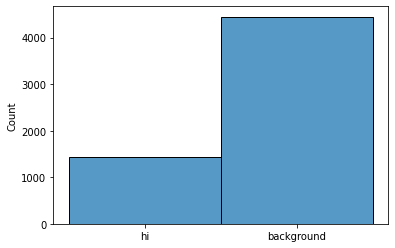

In [31]:
sns.histplot(labels_new)

## Plot some training dataset's samples

In [32]:
backgroundpath = "/content/drive/MyDrive/HindiCharData/training/background"
hipath = "/content/drive/MyDrive/HindiCharData/training/hi"

In [33]:
BackImagesPath = []
for imgname in os.listdir("/content/drive/MyDrive/HindiCharData/training/background")[:16]:
    imgpath = os.path.join(backgroundpath, imgname)
    #print(imgpath)
    BackImagesPath.append(imgpath)

HiImagesPath = []
for imgname in os.listdir("/content/drive/MyDrive/HindiCharData/training/hi")[:16]:
    imgpath = os.path.join(hipath, imgname)
    #print(imgpath)
    HiImagesPath.append(imgpath)

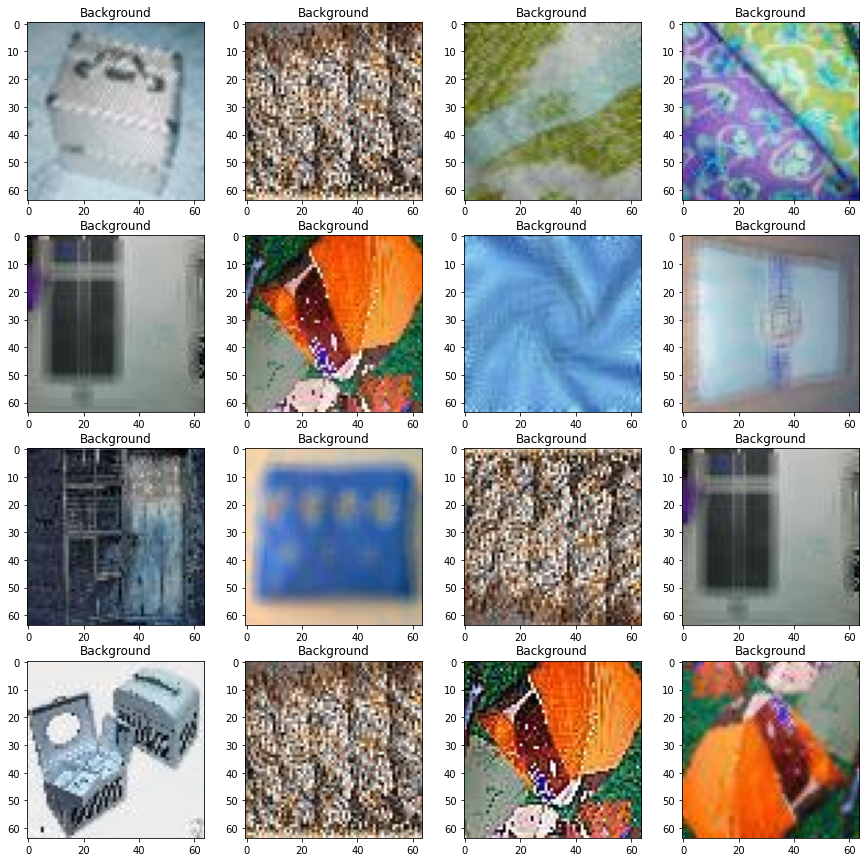

In [34]:
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 4
for i in range(0, columns*rows - 1 +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
    img = cv2.imread(BackImagesPath[i])
    plt.title("Background")
    plt.imshow(img)
plt.show()

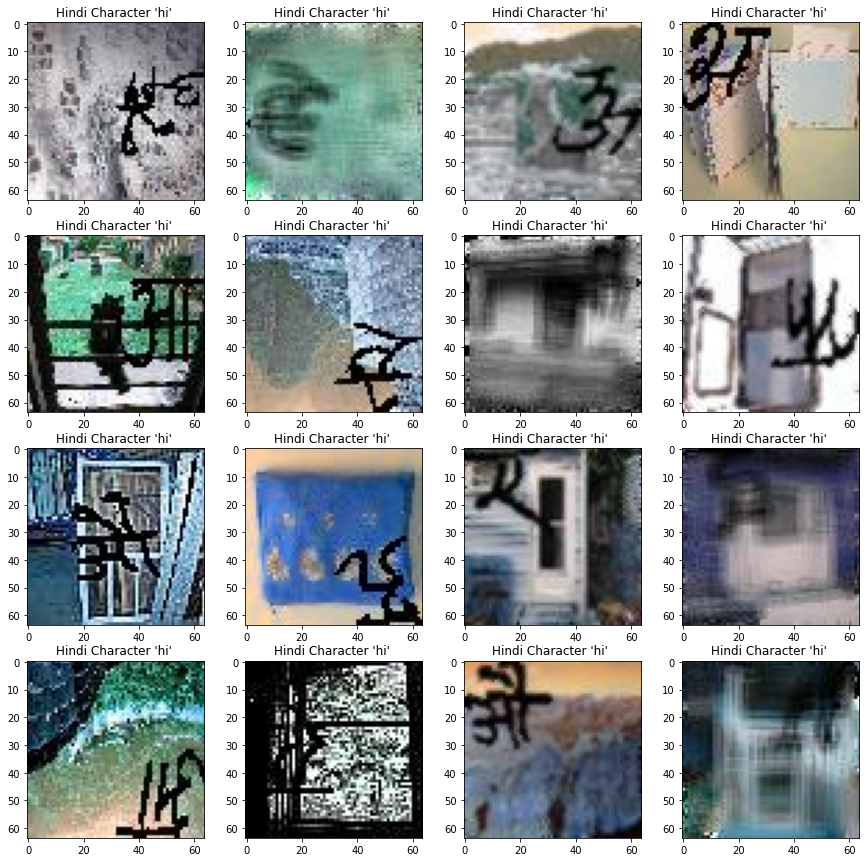

In [35]:
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 4
for i in range(0, columns*rows - 1 +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
    img = cv2.imread(HiImagesPath[i])
    plt.title("Hindi Character 'hi' ")
    plt.imshow(img)
plt.show()

## CNN Model
Build a CNN(Convolutional Neural Network) with <b>four</b> convolution layer and <b>two</b> fully connected layer. 

In [3]:
# Initialising the CNN
model = Sequential()

# 1 - Convolution
model.add(Conv2D(64,(3,3), padding='same', input_shape=(64, 64,3)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 2nd Convolution layer
model.add(Conv2D(128,(5,5), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 3rd Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 4th Convolution layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# Flattening
model.add(Flatten())

# Fully connected layer 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(2, activation='softmax'))

opt = Adam(lr=0.0005)
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 64, 64, 64)        256       
_________________________________________________________________
activation (Activation)      (None, 64, 64, 64)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 128)       5

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


## Model Architecture 

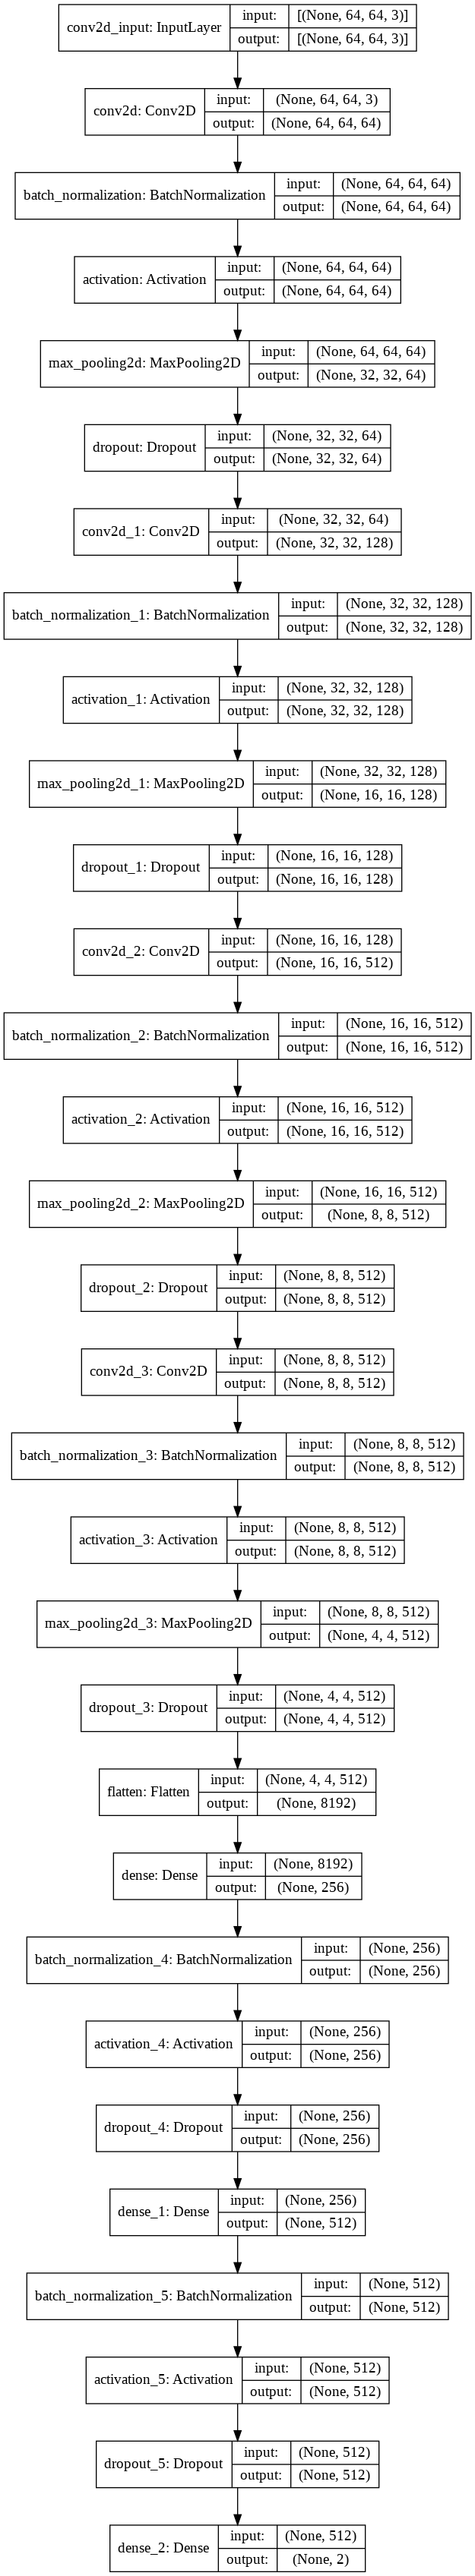

In [38]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

## Split dataset into training and validation dataset in the ratio of 80:20 

In [8]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [10]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size = 0.20, stratify = labels, random_state = 42)

In [11]:
img_size = 64
batch_size = 64

trainAug = ImageDataGenerator(
	rotation_range=30,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")


valAug = ImageDataGenerator()

## Training the model and save the weights 



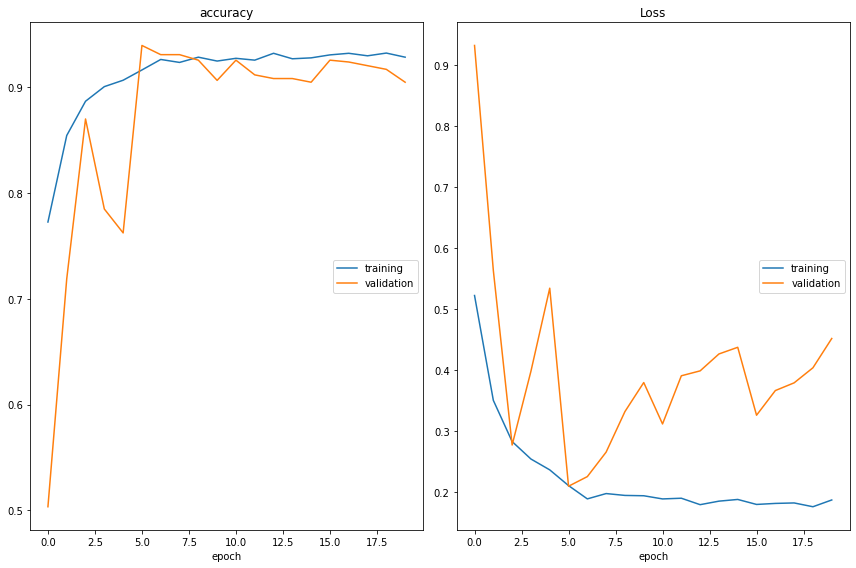

accuracy
	training         	 (min:    0.772, max:    0.932, cur:    0.928)
	validation       	 (min:    0.503, max:    0.939, cur:    0.905)
Loss
	training         	 (min:    0.177, max:    0.523, cur:    0.188)
	validation       	 (min:    0.210, max:    0.932, cur:    0.452)

Epoch 00020: saving model to /content/drive/MyDrive/ModelWeights/model_weights_20_epochs.h5


In [12]:
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                              patience=2, min_lr=0.00001, mode='auto')
checkpoint = ModelCheckpoint("/content/drive/MyDrive/ModelWeights/model_weights_20_epochs.h5", monitor='val_accuracy',
                             save_weights_only=True, mode='max', verbose=1)
callbacks = [PlotLossesKerasTF(), checkpoint, reduce_lr]


H = model.fit(
	x=trainAug.flow(trainX, trainY, batch_size=64),
	steps_per_epoch=len(trainX) // 64,
	validation_data=valAug.flow(testX, testY),
	validation_steps=len(testX) // 64,
	epochs= 20,
    callbacks=callbacks)

## Evalute the model

In [14]:
print("[INFO] evaluating network...")
predictions = model.predict(x=testX.astype("float32"), batch_size=64)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

  background       0.90      1.00      0.95       890
          hi       1.00      0.66      0.79       285

    accuracy                           0.92      1175
   macro avg       0.95      0.83      0.87      1175
weighted avg       0.93      0.92      0.91      1175



## Save the model as JSON file

In [13]:
model_json = model.to_json()
with open("/content/drive/MyDrive/ModelWeights/model_Scratch.json", "w") as json_file:
    json_file.write(model_json)

In [16]:
testData = list(paths.list_images("/content/drive/MyDrive/HindiCharData/test"))

## Plot predicted result by the trained model

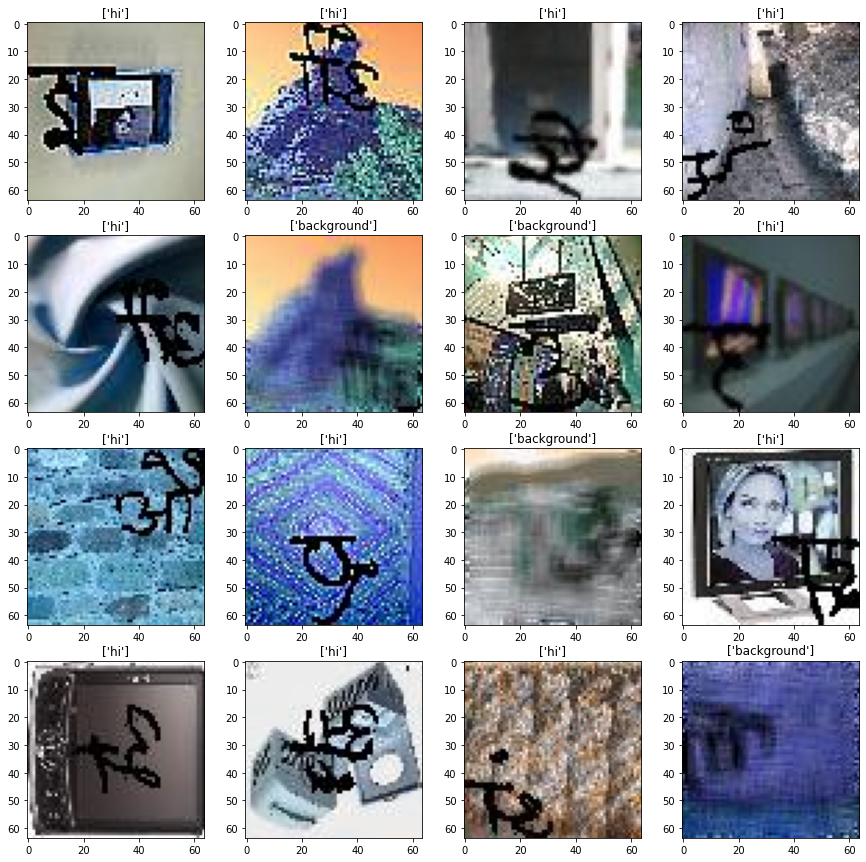

In [18]:
fig = plt.figure(figsize=(15, 15))
columns = 4
rows = 4
for i in range(0, columns*rows - 1 +1):
    #img = np.random.randint(10, size=(h,w))
    fig.add_subplot(rows, columns, i+1)
    img = cv2.imread(testData[i+25])
    imgpre = np.expand_dims(img, axis=0)
    y_prob = model.predict(imgpre)
    y_classes = y_prob.argmax(axis=-1)
    plt.title(lb.classes_[y_classes])
    #print(type(img))
    plt.imshow(img.astype("uint8"))
plt.show()

## Save the predicted result as JSON file

In [39]:
import random
import json
# from utils.io import write_json

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def read_json(filename):
    with open(filename, 'r') as outfile:
        data =  json.load(outfile)
    return data

def generate_sample_file(filename, testData):
    res = {}
    for imgPath in testData:
        test_set = imgPath.split("/")[-1]
        img = cv2.imread(imgPath)
        imgpre = np.expand_dims(img, axis=0)
        y_prob = model.predict(imgpre)
        y_classes = y_prob.argmax(axis=-1)
        res[test_set] = lb.classes_[y_classes][0]

    write_json(filename, res)

if __name__ == '__main__':
    generate_sample_file('/content/drive/MyDrive/ModelWeights/sample_result1.json', testData)
